# Active Subspaces Example Function: Robot Arm

##### Ryan Howard, CO School of Mines, <ryhoward@mines.edu>
##### Paul Constantine, CO School of Mines, <pconstan@mines.edu>

<br>

In this tutorial, we'll be applying active subspaces to the function

$$
f = (u^2+v^2)^{.5},
$$

where $$
u = \sum_{i=1}^4L_i\cos\left(\sum_{j=1}^i\theta_j\right),\\
v = \sum_{i=1}^4L_i\sin\left(\sum_{j=1}^i\theta_j\right),
$$as seen on [http://www.sfu.ca/~ssurjano/robot.html](http://www.sfu.ca/~ssurjano/robot.html). This function returns the origin-to-end distance of a robot arm with four segments, and its inputs and their distributions are described in the table below.

Variable|Symbol|Distribution (U(min, max))
:-----|:-----:|:-----
angle of First Segment|$\theta_1$|U(0, 2$\pi$)
angle of Second Segment|$\theta_2$|U(0, 2$\pi$)
angle of Third Segment|$\theta_3$|U(0, 2$\pi$)
angle of Fourth Segment|$\theta_4$|U(0, 2$\pi$)
length of First Segment|$L_1$|U(0, 1)
length of Second Segment|$L_2$|U(0, 1)
length of Third Segment|$L_3$|U(0, 1)
length of Fourth Segment|$L_4$|U(0, 1)

In [1]:
import active_subspaces as ac
import numpy as np
%matplotlib inline

# The robot_functions.py file contains two functions: the robot function (robot(xx))
# and its gradient (robot_grad(xx)). Each takes an Mx8 matrix (M is the number of data
# points) with rows being normalized inputs; robot returns a column vector of function
# values at each row of the input and robot_grad returns a matrix whose ith row is the
# gradient of robot at the ith row of xx with respect to the normalized inputs
from robot_functions import *

First we draw M samples randomly from the input space.

In [2]:
M = 1000 #This is the number of data points to use

#Sample the input space according to the distributions in the table above
theta = np.random.uniform(0, 2*np.pi, (M, 4))
L = np.random.uniform(0, 1, (M, 4))

#the input matrix
x = np.hstack((theta, L))

Now we normalize the inputs, linearly scaling each to the interval $[-1, 1]$.

In [3]:
#Upper and lower limits for inputs
xl = np.array([0, 0, 0, 0, 0, 0, 0, 0])
xu = np.array([2*np.pi, 2*np.pi, 2*np.pi, 2*np.pi, 1, 1, 1, 1])

#XX = normalized input matrix
XX = ac.utils.misc.BoundedNormalizer(xl, xu).normalize(x)

Compute gradients to approximate the matrix on which the active subspace is based.

In [4]:
#output values (f) and gradients (df)
f = robot(XX)
df = robot_grad(XX)

Now we use our data to compute the active subspace.

In [5]:
#Set up our subspace using the gradient samples
ss = ac.subspaces.Subspaces()
ss.compute(df=df, nboot=500)

We use plotting utilities to plot eigenvalues, subspace error, components of the eigenvectors, and 1D and 2D sufficient summary plots (plots of function values vs. active variable values).

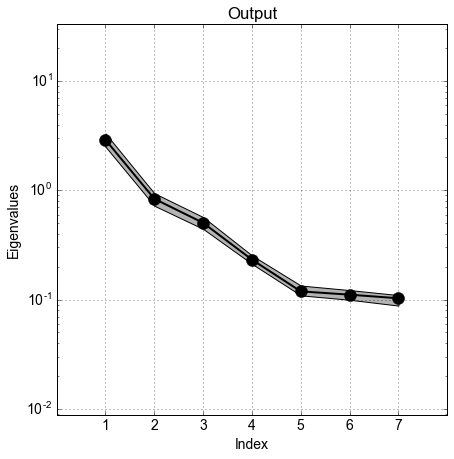

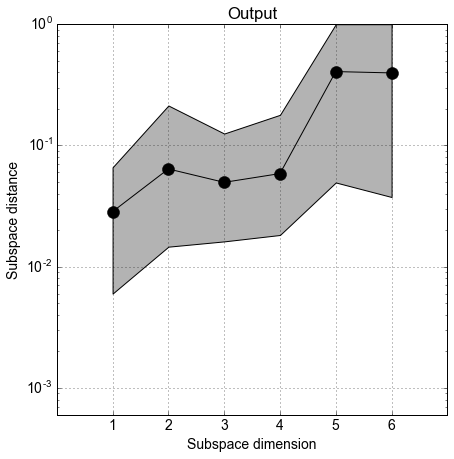

AttributeError: Subspaces instance has no attribute 'eigenvectors'

In [6]:
#Component labels
in_labels = [r't1', r't2', r't3', r't4', r'L1', r'L2', r'L3', r'L4']

#plot eigenvalues, subspace errors
ac.utils.plotters.eigenvalues(ss.eigenvals[:7], ss.e_br[:7,:])
ac.utils.plotters.subspace_errors(ss.sub_br[:6,:])

#manually make the subspace 2D for the eigenvector and 2D summary plots
ss.partition(2)
#Compute the active variable values
y = XX.dot(ss.W1)

#Plot eigenvectors, sufficient summaries
ac.utils.plotters.eigenvectors(ss.eigenvecs[:,:4], in_labels=in_labels)
ac.utils.plotters.eigenvectors(ss.eigenvecs[:,4:], in_labels=in_labels)
ac.utils.plotters.sufficient_summary(y, f)

We can see very little decay in the eigenvalues, so we would not expect a significant active subspace. This can be seen in the lack of trend in both the 1D and 2D sufficient summary plots. Active subspace analysis is thus not suited for this function; other dimension reduction schemes would need to be tried if this was a necessary step in a study's goals.